# Assignment template

## Business Understanding

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns


# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)
# data (as pandas dataframes)
data = real_estate_valuation.data.original

## Data understanding

In [88]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


This dataset clearly contains information/measurements about various houses and their corresponding market values.

The features in the dataset are as follows:
- 'No': A unique identifier for each house (we will not use this feature in modeling)
- 'X1 transaction date': The transaction date (for example, 2013.250 = March 2013)
- 'X2 house age': The age of the house (in years)
- 'X3 distance to the nearest MRT station': The distance to the nearest MRT (Mass Rapid Transit) station
- 'X4 number of convenience stores': The number of convenience stores in the vicinity
- 'X5 latitude': The latitude coordinate of the house location
- 'X6 longitude': The longitude coordinate of the house location
- 'Y house price of unit area': The market price of the house per unit area

Our clear target variable is 'Y house price of unit area', which we will try to predict using the other features in the dataset.

Next we can check some of the basic statistics of the dataset.

In [89]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After studying the basic statistics of the dataset we can see that the average house price per unit area is around 37.98. Something else that could be interesting to note is that the average age of the houses in the dataset is around 17.7 years, and the average distance to the nearest MRT station is around 1083 (presumably in meters). The number of convenience stores in the vicinity varies from 0 to 10, with an average of around 4.1 stores.

Next we wanna see how the different features correlate with the target variable (house price of unit area). We are looking for values that are close to 1 or -1 as they indicate strong positive or negative correlation respectively.

In [90]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
# Display the correlation of each feature with the target variable
target_correlation = correlation_matrix['Y house price of unit area'].sort_values(ascending=False)
print(target_correlation)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


From the correlation numbers we can see that strongest positive correlation with the target variable (house price of unit area) is the feature 'X4 number of convenience stores' with a correlation coefficient of around 0.57. This suggests that houses located in areas with more convenience stores tend to have higher prices per unit area. On the opposite side the strongest negative correlation is the feature 'X3 distance to the nearest MRT station' with a correlation of around -0.67. This indicates that as the distance to the nearest MRT station increases, the house price per unit area tends to decrease.

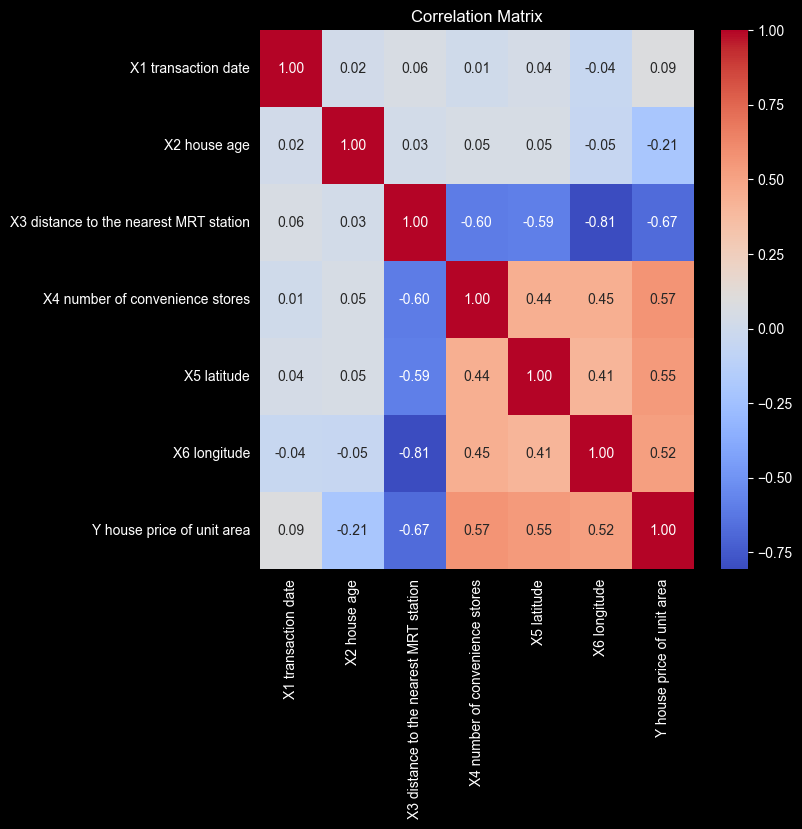

In [91]:
# Dropping the 'No' column as it is just an identifier and does not provide useful information for correlation analysis
data = data.drop(columns=['No'])

# Plot a visual correlation matrix
plt.figure(figsize=(7, 7))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The visual correlation matrix above helps us to identify if other features have some type of correlation with each other. Situations where two features have high correlation are not wanted so we can try to eliminate one of them in the modeling phase. One of such pairs in this dataset is "X3 distance to the nearest MRT station" and "X4 number of convenience stores" which have a correlation of around -0.60

When we are looking at the features and their correlations with the target variable, we can also visualize the relationships using scatter plots. This can help us to see if there are any patterns or trends in the data. Lets create a scatter plot for each feature against the target variable 'Y house price of unit area'.

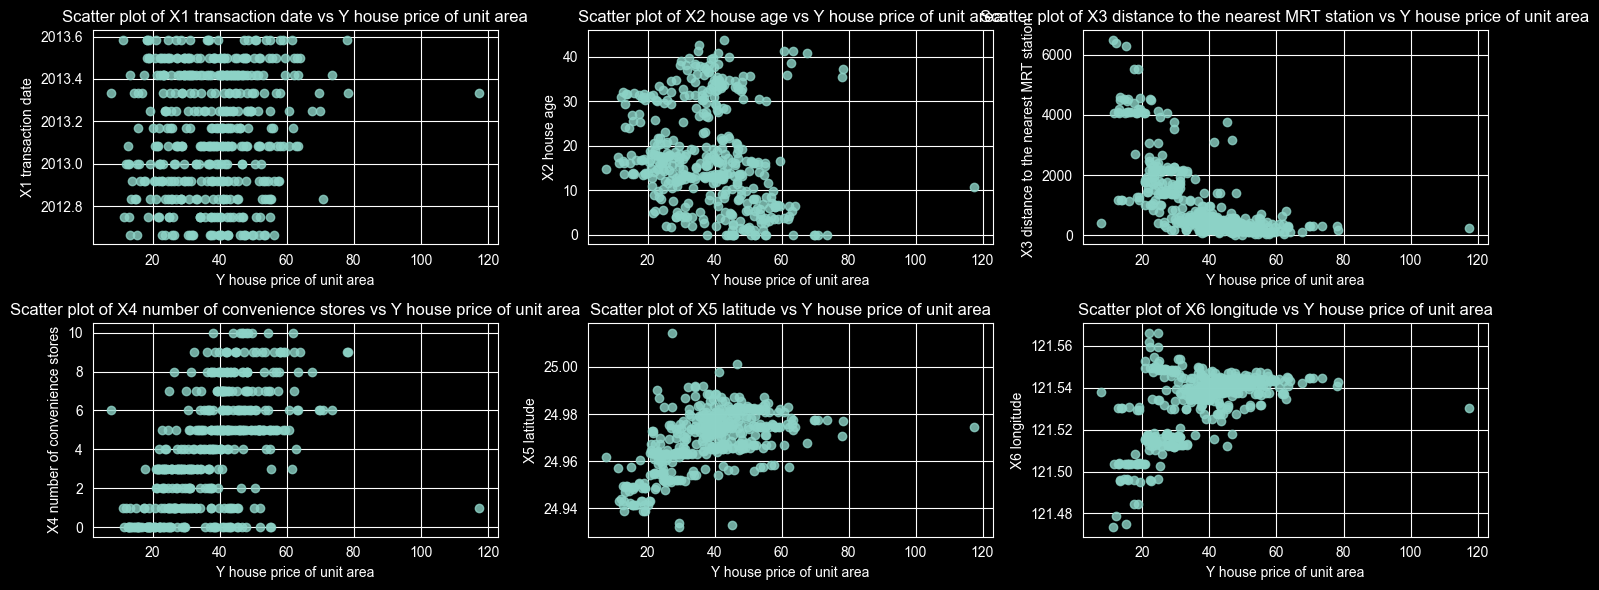

In [92]:
# Creating scatter plots for each feature against the target variable where the feature is on the y-axis and the target variable is on the x-axis
features = data.columns.drop('Y house price of unit area')
target = 'Y house price of unit area'
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()
for i, feature in enumerate(features):
    ax = axes[i]
    ax.scatter(data[target], data[feature], alpha=0.8)
    ax.set_xlabel('Y house price of unit area')
    ax.set_ylabel(feature)
    ax.set_title(f'Scatter plot of {feature} vs {target}')
plt.tight_layout()
plt.show()

From the visual scatter plots we can immediately see that it's much harder to identify clear linear relationships between the features and the target variable compared to the correlation numbers we saw earlier. However, we can still observe some trends:
- Both latitude and longitude seem to have some kind of relationship with the house price per unit area. This makes sense as the location of a house often affects the price.
- While hard to see, there is a slight positive trend between the number of convenience stores and the house price per unit area, which aligns with the positive correlation we observed earlier.

## Data preparation

For data preparation we wanna first check that we dont have any missing data. After that we can split the data to inputs (X) and targets (y) and then split it further to training and testing sets. Finally we can standardize the features using StandardScaler.

In [93]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


The dataset does not contain any missing values, so we can proceed with the data preparation. In the upcoming modeling phase we are going to build linear and logistic regression models. For linear regression we can just split the data and scale it, but since logistic regression is a classification model, we will need to create a new target variable that classifies the houses into two categories based on whether their price per unit area is above or below the average price in the dataset.

In [94]:
# The average price per unit area
average_price = data['Y house price of unit area'].mean()
# Adding a new column 'Price Category' to classify houses as above average (1) or below average (0) based on the 'Y house price of unit area'
data['Price Category'] = data['Y house price of unit area'].apply(lambda x: 1 if x > average_price else 0)


# Splitting the dataset to inputs (X) and targets (y)
X = data.drop(columns=['Y house price of unit area', 'Price Category'])  # inputs
y = data[['Y house price of unit area', 'Price Category']]  # targets for both linear and logistic regression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Separating the target variable for linear regression and logistic regression
linear_y_train = y_train['Y house price of unit area']
linear_y_test = y_test['Y house price of unit area']

logistic_y_train = y_train['Price Category']
logistic_y_test = y_test['Price Category']

# Standardize the features using StandardScaler
scaler = StandardScaler()

# Using fit_transform on the training data to compute the mean and standard deviation.
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Using transform on the test data to apply the same scaling as was computed on the training data.
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.244072,-0.359605,-0.738402,1.016920,-0.166495,0.576185
1,-1.127500,-0.613455,1.584306,-1.392286,-1.184515,2.120780
2,-1.127500,1.522385,-0.475261,0.328575,0.403274,0.323197
3,1.522785,-0.079495,0.445225,-0.703942,-1.237629,1.175813
4,-1.714097,-0.149523,-0.628657,0.328575,1.022938,0.638620


## Modeling

For the modeling phase we will create two models: a linear regression model and a logistic regression model. The linear regression model will be used to predict the house price per unit area, while the logistic regression model will be used to classify the houses into two categories based on whether their price per unit area is above or below the average. We will start with the linear regression model.

In [95]:
# Building and fitting the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, linear_y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Now we can proceed to build the logistic regression model.

In [96]:
# Building and fitting the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, logistic_y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Models are now built and fitted to the training data.

## Evaluation

When evaluating the performance of the linear regression model it doesn't make sense to use accuracy or confusion matrix as those are used for classification problems. Instead we can use the Mean Absolute Error (MAE) which is the average of the absolute differences between the predicted values and the actual values. A lower MAE indicates a better fit of the model to the data.

In [97]:
linear_predictions = linear_model.predict(X_test)
print("Mean absolute error for linear regression: %.2f" % mean_absolute_error(linear_y_test, linear_predictions))

Mean absolute error for linear regression: 4.96


For the logistic regression model we can absolutely use accuracy and confusion matrix to evaluate the performance. Accuracy will give us the overall percentage of correct predictions, while the confusion matrix will show us the breakdown of true positives, true negatives, false positives, and false negatives. Lets first print out a classification report.

In [98]:
# Classification report for logistic regression
from sklearn.metrics import classification_report
logistic_predictions = logistic_model.predict(X_test)
print("Classification Report for Logistic Regression:")
print(classification_report(logistic_y_test, logistic_predictions, target_names=['Below Average', 'Above Average']))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

Below Average       0.84      0.79      0.82        39
Above Average       0.83      0.86      0.84        44

     accuracy                           0.83        83
    macro avg       0.83      0.83      0.83        83
 weighted avg       0.83      0.83      0.83        83



Accuracy: 83.13%


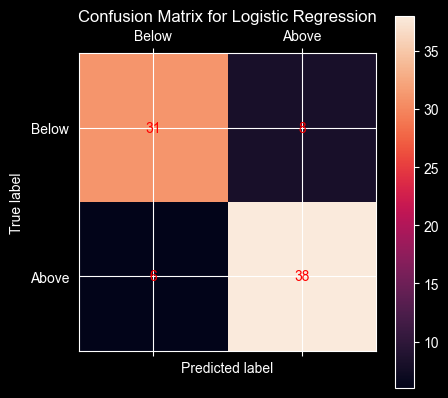

In [102]:
accuracy = accuracy_score(logistic_y_test, logistic_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100))

# use numeric labels present in y_true (0 = Below, 1 = Above)
matrix = confusion_matrix(logistic_y_test, logistic_predictions, labels=[0, 1])

plt.matshow(matrix)
plt.title('Confusion Matrix for Logistic Regression')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks([0, 1], ['Below', 'Above'])
plt.yticks([0, 1], ['Below', 'Above'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='red')
plt.show()


Both models have been evaluated. The linear regression model has a Mean Absolute Error of around 5, which indicates that on average, the predicted house price per unit area is off by about 5 units from the actual price. The logistic regression model has an accuracy of around 83%, which means that it correctly classified about 83% of the houses as either above or below average in terms of price per unit area. The confusion matrix shows that there were some misclassifications, with a few houses being incorrectly classified as above average when they were actually below average, and vice versa.

## Deployment